In [1]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('male(imputed).csv')
df

,gender,match,samerace,age_o,field_cd,like_o,shar_o,sinc_o,race_o,intel_o,attr_o,amb_o,fun_o,age,race,imprace,imprelig,exphappy,career_c,dec_o
0,1,0,0,21,8,7.000000,5.00000,9.000000,4,7.000000,6.000000,6.000000,7.000000,27,2,7,3,7,2.0,1
1,1,0,1,24,8,6.000000,3.00000,7.000000,2,8.000000,5.000000,6.000000,4.000000,27,2,7,3,7,2.0,0
2,1,0,1,25,8,8.000000,9.00000,9.000000,2,10.000000,7.000000,8.000000,7.000000,27,2,7,3,7,2.0,0
3,1,0,1,23,8,6.000000,7.00000,10.000000,2,8.000000,4.000000,8.000000,5.000000,27,2,7,3,7,2.0,0
4,1,0,1,21,8,7.000000,2.00000,8.000000,2,8.000000,5.000000,2.000000,2.000000,27,2,7,3,7,2.0,0
5,1,0,0,23,8,6.000000,6.00000,9.000000,4,7.000000,6.000000,7.000000,6.000000,27,2,7,3,7,2.0,1
6,1,0,0,22,8,7.000000,4.00000,8.000000,4,8.000000,4.000000,7.000000,5.000000,27,2,7,3,7,2.0,0
7,1,0,1,25,8,4.000000,5.00000,8.000000,2,7.000000,5.000000,7.000000,4.000000,27,2,7,3,7,2.0,1
8,1,0,0,26,8,5.000000,6.00000,10.000000,6,9.000000,8.000000,7.000000,8.000000,27,2,7,3,7,2.0,1
9,1,0,1,26,8,6.000000,5.41045,10.000000,2,10.000000,6.000000,6.000000,6.000000,27,2,7,3,7,2.0,0


In [24]:
df2 = df[['sinc_o', 'like_o', 'shar_o', 'race_o', 'intel_o', 'attr_o', 'amb_o', 'fun_o', 'dec_o']]
df2

,sinc_o,like_o,shar_o,race_o,intel_o,attr_o,amb_o,fun_o,dec_o
0,9.000000,7.000000,5.00000,4,7.000000,6.000000,6.000000,7.000000,1
1,7.000000,6.000000,3.00000,2,8.000000,5.000000,6.000000,4.000000,0
2,9.000000,8.000000,9.00000,2,10.000000,7.000000,8.000000,7.000000,0
3,10.000000,6.000000,7.00000,2,8.000000,4.000000,8.000000,5.000000,0
4,8.000000,7.000000,2.00000,2,8.000000,5.000000,2.000000,2.000000,0
5,9.000000,6.000000,6.00000,4,7.000000,6.000000,7.000000,6.000000,1
6,8.000000,7.000000,4.00000,4,8.000000,4.000000,7.000000,5.000000,0
7,8.000000,4.000000,5.00000,2,7.000000,5.000000,7.000000,4.000000,1
8,10.000000,5.000000,6.00000,6,9.000000,8.000000,7.000000,8.000000,1
9,10.000000,6.000000,5.41045,2,10.000000,6.000000,6.000000,6.000000,0


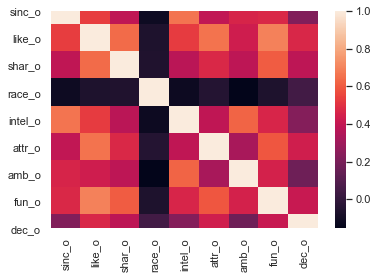

In [25]:
import seaborn as sns

sns.heatmap(df2.corr())

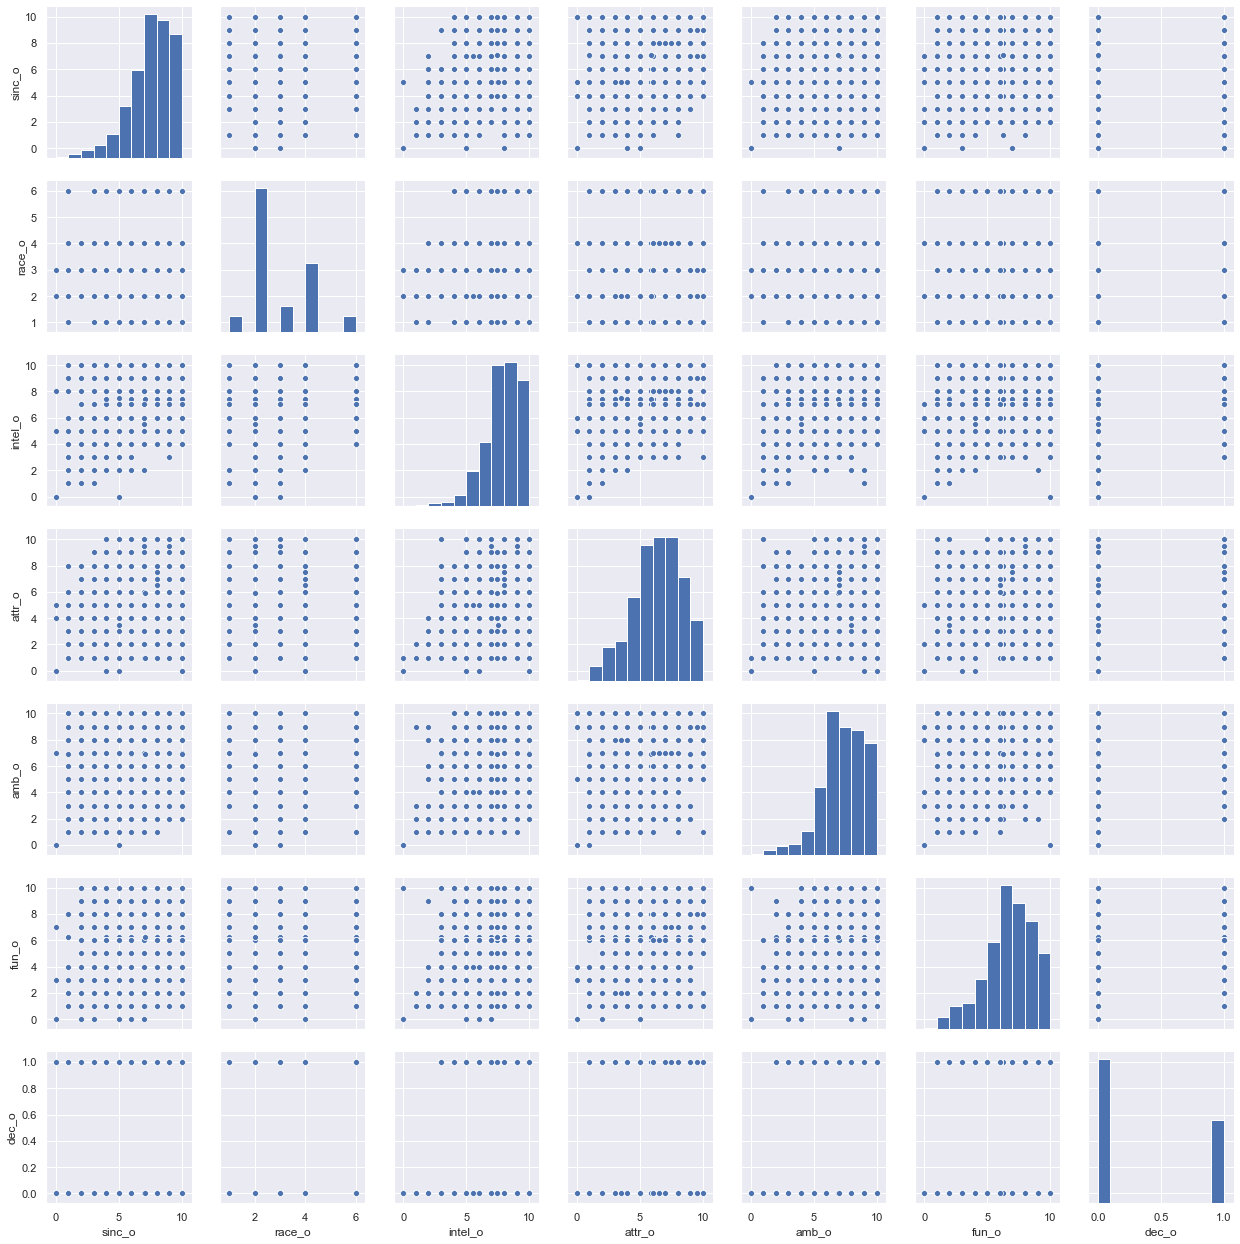

In [19]:
sns.pairplot(data=df2)

In [26]:
del df2['race_o']
df2

,sinc_o,like_o,shar_o,intel_o,attr_o,amb_o,fun_o,dec_o
0,9.000000,7.000000,5.00000,7.000000,6.000000,6.000000,7.000000,1
1,7.000000,6.000000,3.00000,8.000000,5.000000,6.000000,4.000000,0
2,9.000000,8.000000,9.00000,10.000000,7.000000,8.000000,7.000000,0
3,10.000000,6.000000,7.00000,8.000000,4.000000,8.000000,5.000000,0
4,8.000000,7.000000,2.00000,8.000000,5.000000,2.000000,2.000000,0
5,9.000000,6.000000,6.00000,7.000000,6.000000,7.000000,6.000000,1
6,8.000000,7.000000,4.00000,8.000000,4.000000,7.000000,5.000000,0
7,8.000000,4.000000,5.00000,7.000000,5.000000,7.000000,4.000000,1
8,10.000000,5.000000,6.00000,9.000000,8.000000,7.000000,8.000000,1
9,10.000000,6.000000,5.41045,10.000000,6.000000,6.000000,6.000000,0


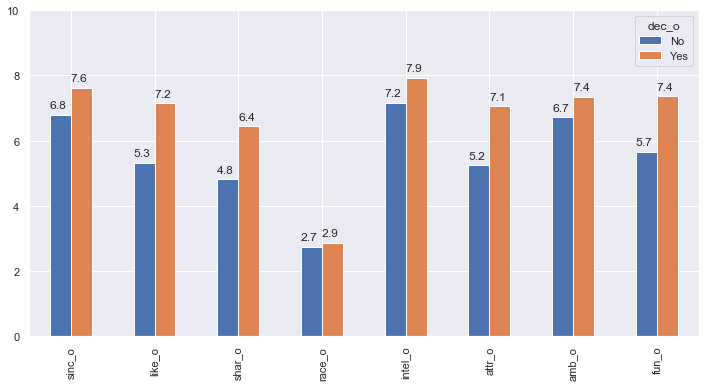

In [29]:
tmp = df[['sinc_o', 'like_o', 'shar_o', 'race_o', 'intel_o', 'attr_o', 'amb_o', 'fun_o', 'dec_o']].groupby('dec_o').mean().stack().unstack(0)
tmp = tmp.rename(columns={0: 'No', 1: 'Yes'})
ax = tmp.plot(kind='bar', figsize=(12,6), ylim=(0,10))       
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.2,\
           str(round((i.get_height()), 1)))